In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30


In [3]:
train = pd.read_csv("C:\Ptest\dacon펭귄/train.csv")
test = pd.read_csv("C:\Ptest\dacon펭귄/test.csv")
submission = pd.read_csv("C:\Ptest\dacon펭귄/sample_submission.csv")

In [4]:
train.shape

(114, 11)

In [5]:
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [6]:
# 범주형 Species, Island, Clutch Completion, Sex  4 개
# 수치형, ID, Culmen Length, Culmen Depth, Flipper Length, Delta 15N, Delta 13 C, Body Mass 7개
# label은 Boddy Mass

discrete_names = ['Species', 'Island', 'Clutch Completion', 'Sex']
continuous_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

In [7]:
train.Species.unique()

array(['Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Adelie Penguin (Pygoscelis adeliae)'], dtype=object)

In [8]:
train.Island.unique()

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [9]:
train['Clutch Completion'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
train['Sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,114.0,56.500000,33.052988,0.00000,28.250000,56.50000,84.750000,113.00000
Culmen Length (mm),114.0,44.613158,5.321829,33.50000,40.325000,45.20000,49.075000,55.10000
Culmen Depth (mm),114.0,17.014912,1.941363,13.20000,15.225000,17.25000,18.600000,21.10000
Flipper Length (mm),114.0,203.052632,14.653425,174.00000,190.000000,199.00000,216.000000,231.00000
Delta 15 N (o/oo),111.0,8.737634,0.567698,7.63220,8.272585,8.63259,9.264635,10.02544
Delta 13 C (o/oo),111.0,-25.723051,0.859786,-27.01854,-26.434025,-25.95541,-25.005945,-24.10255
Body Mass (g),114.0,4327.850877,781.766484,2700.00000,3675.000000,4250.00000,4850.000000,6300.00000


In [13]:
test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [14]:
test.shape

(228, 10)

In [15]:
submission.head()

,id,Body Mass (g)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [16]:
submission.shape

(228, 2)

In [17]:
train.columns

Index(['id', 'Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')

In [18]:
test.columns

Index(['id', 'Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)'],
      dtype='object')

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   228 non-null    int64  
 1   Species              228 non-null    object 
 2   Island               228 non-null    object 
 3   Clutch Completion    228 non-null    object 
 4   Culmen Length (mm)   228 non-null    float64
 5   Culmen Depth (mm)    228 non-null    float64
 6   Flipper Length (mm)  228 non-null    float64
 7   Sex                  222 non-null    object 
 8   Delta 15 N (o/oo)    219 non-null    float64
 9   Delta 13 C (o/oo)    220 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 17.9+ KB


In [20]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

check_missing_col(train)

print("-" * 30)

check_missing_col(test)

결측치가 있는 컬럼은: Sex입니다
총 3개의 결측치가 존재합니다.

결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
총 3개의 결측치가 존재합니다.

결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
총 3개의 결측치가 존재합니다.

결측치가 있는 컬럼 의 개수는 3 입니다
------------------------------
결측치가 있는 컬럼은: Sex입니다
총 6개의 결측치가 존재합니다.

결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
총 9개의 결측치가 존재합니다.

결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
총 8개의 결측치가 존재합니다.

결측치가 있는 컬럼 의 개수는 3 입니다


In [21]:
train_input = train.copy()
test_input = test.copy()

# Gentoo penguin (Pygoscelis papua)
# Adelie Penguin (Pygoscelis adeliae)
# Chinstrap penguin (Pygoscelis antarctica)

Species_dic = {
    "Gentoo penguin (Pygoscelis papua)" : "Gentoo",
    "Adelie Penguin (Pygoscelis adeliae)" : "Adelie",
    "Chinstrap penguin (Pygoscelis antarctica)" : "Chinstrap"
    }

train_input["Species"] = train_input["Species"].map(Species_dic)
test_input["Species"] = test_input["Species"].map(Species_dic)

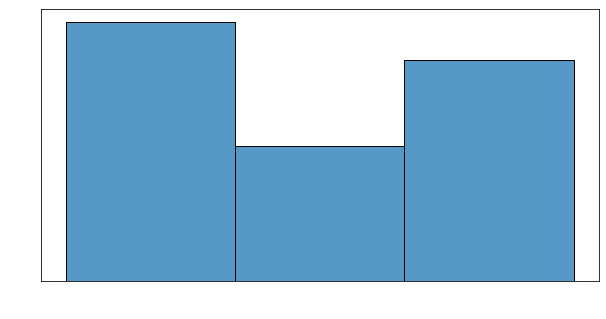

Gentoo       48
Adelie       41
Chinstrap    25
Name: Species, dtype: int64

In [22]:
plt.figure(figsize = (10,5))
ax = sns.histplot(train_input["Species"])
plt.show()

train_input["Species"].value_counts()

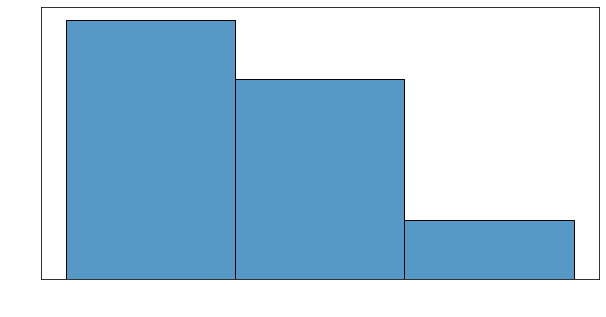

Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64

In [23]:
plt.figure(figsize = (10,5))
ax = sns.histplot(train_input["Island"])
plt.show()

train_input["Island"].value_counts()

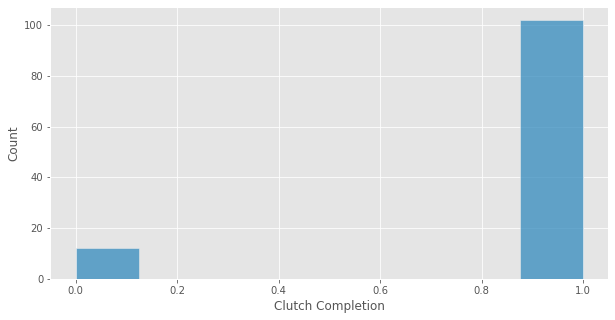

1    102
0     12
Name: Clutch Completion, dtype: int64

In [42]:
plt.figure(figsize = (10,5))
ax = sns.histplot(train_input["Clutch Completion"])
plt.show()

train_input["Clutch Completion"].value_counts()

ConversionError: Failed to convert value(s) to axis units: 0        MALE
1        MALE
2      FEMALE
3      FEMALE
4        MALE
        ...  
109    FEMALE
110      MALE
111      MALE
112    FEMALE
113      MALE
Name: x, Length: 114, dtype: object

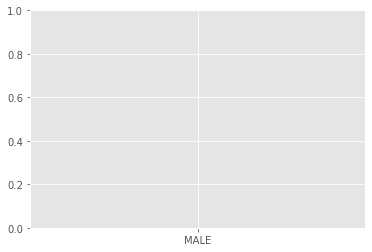

In [50]:
sns.histplot(train["Sex"])

<AxesSubplot:>

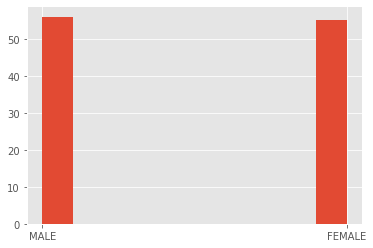

In [49]:
train["Sex"].hist()

ConversionError: Failed to convert value(s) to axis units: 0        MALE
1        MALE
2      FEMALE
3      FEMALE
4        MALE
        ...  
109    FEMALE
110      MALE
111      MALE
112    FEMALE
113      MALE
Name: x, Length: 114, dtype: object

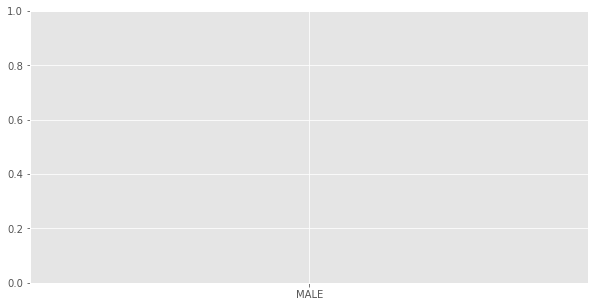

In [43]:
plt.figure(figsize = (10,5))
ax = sns.histplot(train["Sex"])
plt.show()

train["Sex"].value_counts()



In [28]:
train_input.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo,Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap,Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo,Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo,Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo,Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [29]:
# df[column_name].replace([old_value1, old_value2, old_value3],[new_value1, new_value2, new_value3])
# Yes면 1 No면 0, MALE이면 1, FEMALE이면 0으로 변환

train_input["Clutch Completion"].replace(["Yes", "No"], [1,0], inplace = True)
train_input["Sex"].replace(["MALE", "FEMALE"], [1,0], inplace = True)


In [30]:
train_input.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo,Biscoe,1,50.0,15.3,220,1.0,8.30515,-25.19017,5550
1,1,Chinstrap,Dream,0,49.5,19.0,200,1.0,9.63074,-24.34684,3800
2,2,Gentoo,Biscoe,1,45.1,14.4,210,0.0,8.51951,-27.01854,4400
3,3,Gentoo,Biscoe,1,44.5,14.7,214,0.0,8.20106,-26.16524,4850
4,4,Gentoo,Biscoe,0,49.6,16.0,225,1.0,8.38324,-26.84272,5700


{'whiskers': [<matplotlib.lines.Line2D at 0x16ed868ae80>,
 'caps': [<matplotlib.lines.Line2D at 0x16ed8398070>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ed867e130>],
 'medians': [<matplotlib.lines.Line2D at 0x16ed8398e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ed8398520>],
 'means': []}

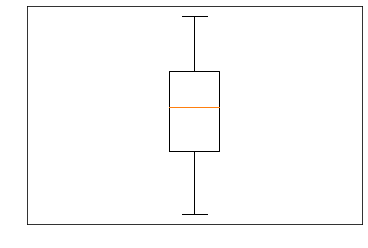

In [31]:
plt.boxplot(train_input["Culmen Length (mm)"])

In [32]:
numeric_feature = train_input.columns[(train_input.dtypes == int) | (train_input.dtypes == float)]
categorical_feature = train_input.columns[(train_input.dtypes =='O')]

In [33]:
print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
카테고리형 데이터는 다음과 같습니다. 
 ['Species', 'Island']


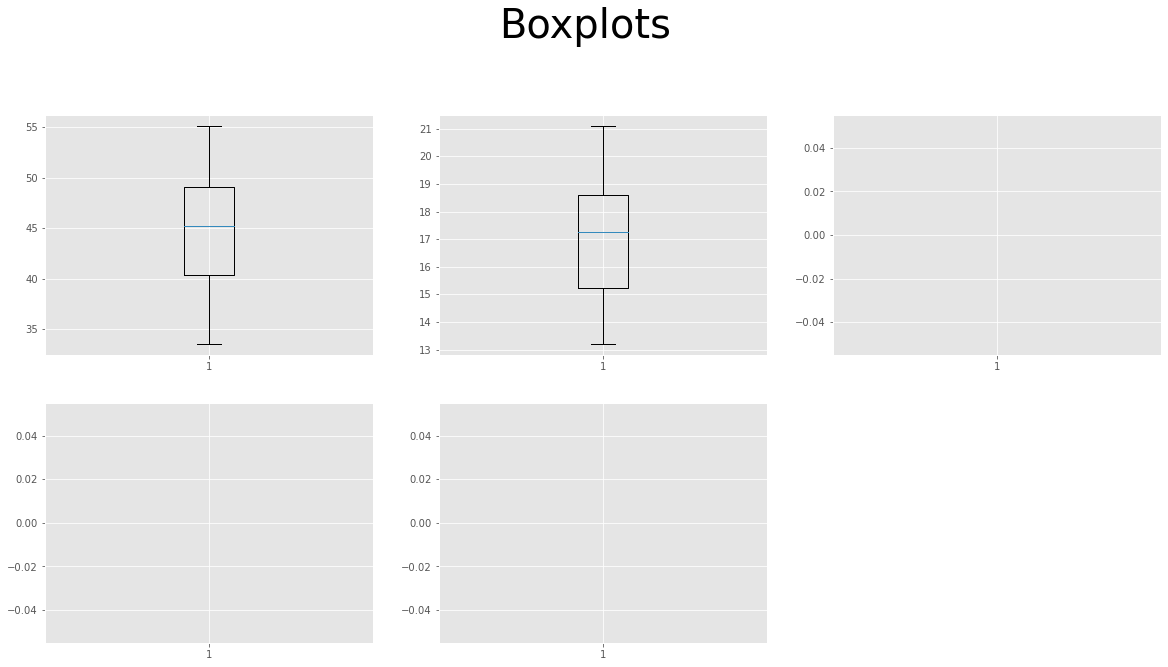

In [34]:
# 수치형 데이터 시각화

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

plt.figure(figsize = (20,15))
plt.suptitle("Boxplots", fontsize = 40)

for i in range(len(feature)):
  plt.subplot(3,3,i+1)
  plt.title(feature[i])
  plt.boxplot(train_input[feature[i]])

plt.show()

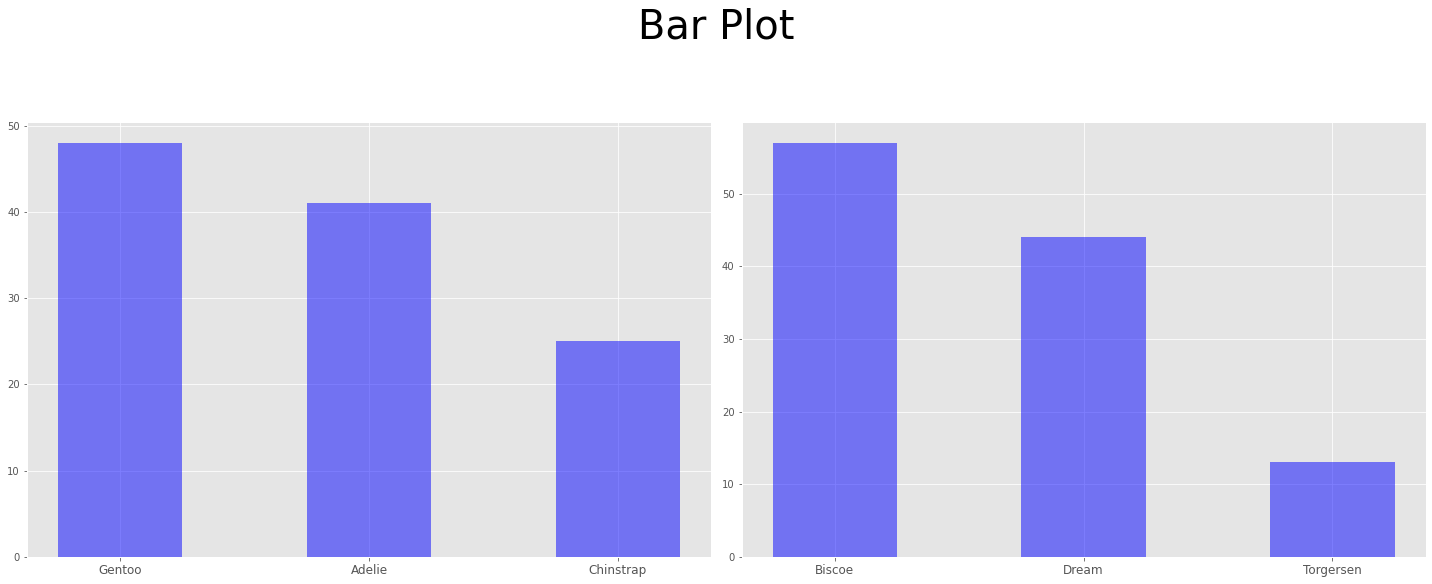

In [35]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train_input[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

corr_df = train_input.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

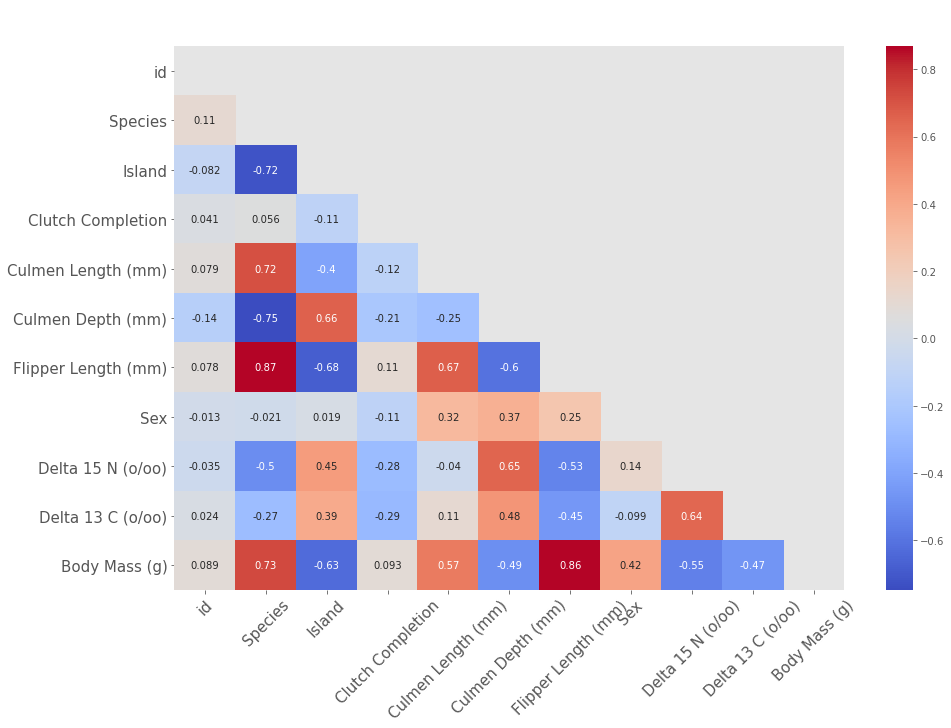

In [37]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [38]:
corr_df.corr()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
id,1.000000,0.112046,-0.082475,0.040823,0.078787,-0.144788,0.077909,-0.012769,-0.035484,0.024416,0.089186
Species,0.112046,1.000000,-0.719412,0.056322,0.716384,-0.747121,0.868122,-0.021280,-0.496627,-0.267908,0.734949
Island,-0.082475,-0.719412,1.000000,-0.110298,-0.401103,0.663206,-0.680380,0.019105,0.454373,0.391650,-0.628816
Clutch Completion,0.040823,0.056322,-0.110298,1.000000,-0.119988,-0.210304,0.105076,-0.112920,-0.277890,-0.291190,0.093065
Culmen Length (mm),0.078787,0.716384,-0.401103,-0.119988,1.000000,-0.251255,0.672205,0.323774,-0.040205,0.114983,0.572063
Culmen Depth (mm),-0.144788,-0.747121,0.663206,-0.210304,-0.251255,1.000000,-0.603341,0.369495,0.650629,0.477688,-0.490643
Flipper Length (mm),0.077909,0.868122,-0.680380,0.105076,0.672205,-0.603341,1.000000,0.250558,-0.533212,-0.454315,0.864814
Sex,-0.012769,-0.021280,0.019105,-0.112920,0.323774,0.369495,0.250558,1.000000,0.136194,-0.099384,0.420227
Delta 15 N (o/oo),-0.035484,-0.496627,0.454373,-0.277890,-0.040205,0.650629,-0.533212,0.136194,1.000000,0.641107,-0.548678
Delta 13 C (o/oo),0.024416,-0.267908,0.391650,-0.291190,0.114983,0.477688,-0.454315,-0.099384,0.641107,1.000000,-0.468425


In [39]:
np.zeros_like(heat_table)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
np.triu_indices_from(mask)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
         6,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,  9, 10],
       dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,
         7,  8,  9, 10,  2,  3,  4,  5,  6,  7,  8,  9, 10,  3,  4,  5,  6,
         7,  8,  9, 10,  4,  5,  6,  7,  8,  9, 10,  5,  6,  7,  8,  9, 10,
         6,  7,  8,  9, 10,  7,  8,  9, 10,  8,  9, 10,  9, 10, 10],
       dtype=int64))